In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_absolute_error,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
!pip install scikit-multilearn
from sklearn.multioutput import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from sklearn.cluster import KMeans
import pickle
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.4 MB/s eta 0:00:00


In [2]:
df= pd.read_csv("/data/3_Data_Clean.csv")

In [3]:
df.head()

,Age,Weight,FCVC,NCP,CH2O,FAF,Gender,family_history_with_overweight,FAVC,CAEC_Always,...,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,"Age_Group_(13.999, 19.0]","Age_Group_(19.0, 22.0]","Age_Group_(22.0, 26.0]","Age_Group_(26.0, 61.0]"
0,0.148936,0.186567,0.5,0.666667,0.5,0.000000,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.148936,0.126866,1.0,0.666667,1.0,1.000000,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.191489,0.283582,0.5,0.666667,0.5,0.666667,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.276596,0.358209,1.0,0.666667,0.5,0.666667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.170213,0.379104,0.5,0.000000,0.5,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [4]:
df.columns

Index(['Age', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'Gender',
       'family_history_with_overweight', 'FAVC', 'CAEC_Always',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE', 'SCC',
       'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight',
       'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II',
       'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
       'NObeyesdad_Overweight_Level_II', 'Age_Group_(13.999, 19.0]',
       'Age_Group_(19.0, 22.0]', 'Age_Group_(22.0, 26.0]',
       'Age_Group_(26.0, 61.0]'],
      dtype='object')

In [5]:
df.rename(columns={ 'Age_Group_(13.999, 19.0]': 'Age_Group_14_19','Age_Group_(19.0, 22.0]' : 'Age_Group_19.0_22.0' , 'Age_Group_(22.0, 26.0]' : 'Age_Group_23.0_26.0',
       'Age_Group_(26.0, 61.0]' : 'Age_Group_27.0_61.0'}, inplace=True)

## Classifying the people whether they monitor the calorie consumption or not.

In [6]:
X =  df.drop(columns = ['SCC']).copy()

In [7]:
Y = df['SCC']

Splitting the dataset into training, testing and validation datasets.

In [8]:
train_size=0.6

In [9]:
X_train, X_rem, y_train, y_rem = train_test_split(X,Y, train_size=0.6, shuffle= True)

In [10]:
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, shuffle= True)

In [11]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(1266, 34)
(1266,)
(422, 34)
(422,)
(423, 34)
(423,)


(None, None)

## Using Support Vector Machine for performing binary classification

In [12]:
from sklearn.model_selection import cross_val_score
c = [0.1, 0.25, 0.5,1,2]
for i in c:   
  model_soft=SVC(kernel= 'linear',C=i)
  model_soft.fit(X_train,y_train)
  # calculating training accuracy
  accuracies = cross_val_score(estimator = model_soft, X = X_train, y = y_train, cv = 5)
  validation_accuracies = cross_val_score(estimator = model_soft, X = X_valid, y = y_valid, cv = 5)
  test_accuracies = cross_val_score(estimator = model_soft, X = X_test, y = y_test, cv = 5)
  # printing training accuracy
  print("\nThe accuracy with C:{:.2f}:".format(i), accuracies.mean())
  print("\nThe validation accuracy with C:{:.2f}:".format(i), validation_accuracies.mean())
  print("\nThe test accuracy with C:{:.2f}:".format(i), test_accuracies.mean())


The accuracy with C:0.10: 0.9597180293174816

The validation accuracy with C:0.10: 0.9431372549019608

The test accuracy with C:0.10: 0.9503641456582633

The accuracy with C:0.25: 0.9597180293174816

The validation accuracy with C:0.25: 0.9431372549019608

The test accuracy with C:0.25: 0.9503641456582633

The accuracy with C:0.50: 0.9597180293174816

The validation accuracy with C:0.50: 0.9431372549019608

The test accuracy with C:0.50: 0.9503641456582633

The accuracy with C:1.00: 0.9597180293174816

The validation accuracy with C:1.00: 0.9431372549019608

The test accuracy with C:1.00: 0.9456582633053221

The accuracy with C:2.00: 0.9597180293174816

The validation accuracy with C:2.00: 0.9336694677871149

The test accuracy with C:2.00: 0.9432773109243697


In [13]:
# save the model to disk
filename = 'svm_model_1.pkl'
pickle.dump(model_soft, open(filename, 'wb'))

## Using random forest classifier

In [13]:
rfc = RandomForestClassifier()

In [14]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
# model assessment
pred_test_rfc = rfc.predict(X_test)
pred_valid_rfc = rfc.predict(X_valid)
pred_train_rfc = rfc.predict(X_train)

In [16]:
print('Train Accuracy: ', accuracy_score(y_train, pred_train_rfc))
print('Validation Accuracy: ', accuracy_score(y_valid, pred_valid_rfc))
print('Test Accuraccy: ', accuracy_score(y_test, pred_test_rfc))

Train Accuracy:  1.0
Validation Accuracy:  0.966824644549763
Test Accuraccy:  0.9598108747044918


## Using XGBoost classifier

In [18]:
import time
from xgboost import XGBClassifier

In [19]:
xgbmodel = XGBClassifier(early_stopping=10,n_estimators=50, random_state=0)

In [20]:
# fit the model
xgbmodel.fit(X_train,y_train)

/Users/harman/miniconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:52:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1705650162823/work/src/learner.cc:742: 
Parameters: { "early_stopping" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping=10,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [21]:
# model assessment
pred_test = xgbmodel.predict(X_test)
pred_train = xgbmodel.predict(X_train)
pred_validation = xgbmodel.predict(X_valid)

In [22]:
print('Train Accuracy: ', accuracy_score(y_train, pred_train))
print('Validation Accuraccy: ', accuracy_score(y_valid, pred_validation))
print('Test Accuraccy: ', accuracy_score(y_test, pred_test))

Train Accuracy:  1.0
Validation Accuraccy:  0.9644549763033176
Test Accuraccy:  0.9598108747044918


In [23]:
model_new = XGBClassifier(n_estimators=50, random_state=0,reg_lambda=1)

In [24]:
# define the eval set and metric
eval_set = [(X_train,y_train), (X_valid, y_valid)]
eval_metric = ["mlogloss","error"]

In [25]:
model_new.fit(X_train,y_train, eval_set=eval_set, eval_metric= ["logloss", "mae"], verbose=False)

/Users/harman/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [26]:
# retrieve performance metrics
results =  model_new.evals_result()


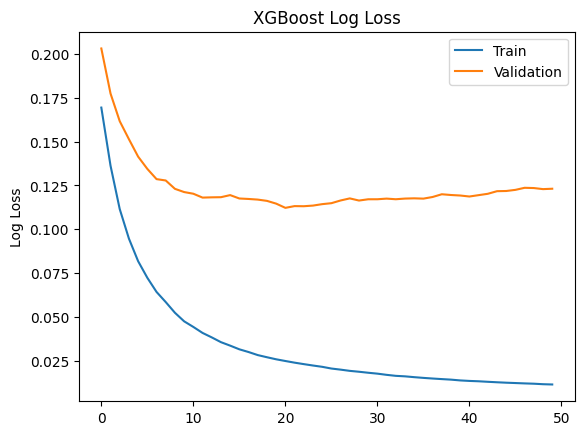

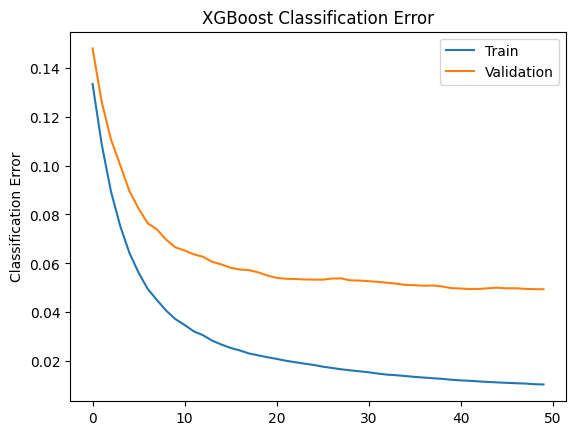

In [27]:
epochs = len(results['validation_0']['mae'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Validation')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Validation')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [28]:
# save the model to disk
filename = 'xgb_model_1.pkl'
pickle.dump(model_new, open(filename, 'wb'))

## Unsupervised Algorithms: KMeans

In [28]:
Kmean = KMeans(n_clusters=2)

In [29]:
Kmean.fit(X_train)

/Users/harman/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [30]:
Kmean.cluster_centers_

array([[ 3.72302834e-01,  3.46112980e-01,  6.64170595e-01,
         5.63136101e-01,  4.57467832e-01,  3.31496624e-01,
         3.85159011e-01,  8.97526502e-01,  9.29328622e-01,
         2.47349823e-02,  5.65371025e-02,  9.04593640e-01,
         1.41342756e-02,  2.82685512e-02,  6.50521303e-19,
         7.06713781e-02,  6.04240283e-01,  3.25088339e-01,
         9.75265018e-01,  3.53356890e-03,  7.06713781e-03,
         6.66133815e-16,  1.41342756e-02,  7.77385159e-02,
         1.13074205e-01,  2.82685512e-01,  1.80212014e-01,
        -8.32667268e-17,  1.44876325e-01,  2.01413428e-01,
         1.02473498e-01,  4.24028269e-02,  9.89399293e-02,
         7.56183746e-01],
       [ 1.69974676e-01,  3.59008467e-01,  7.21284386e-01,
         5.53842003e-01,  5.04704492e-01,  3.37494458e-01,
         5.34079349e-01,  8.01627670e-01,  8.67751780e-01,
         2.64496439e-02,  1.25127162e-01,  8.19938962e-01,
         2.84842319e-02,  2.33977620e-02,  1.01729400e-03,
         2.23804680e-02,  6.91

In [31]:
Kmean.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [32]:
# model assessment
pred_testk = Kmean.predict(X_test)
pred_traink = Kmean.predict(X_train)
pred_validationk = Kmean.predict(X_valid)

In [33]:
print('Train Accuracy: ', accuracy_score(y_train, pred_traink))
print('Validation Accuraccy: ', accuracy_score(y_valid, pred_validationk))
print('Test Accuraccy: ', accuracy_score(y_test, pred_testk))

Train Accuracy:  0.2480252764612954
Validation Accuraccy:  0.2843601895734597
Test Accuraccy:  0.23404255319148937


Classification of the dataset into the 4 age groups

In [34]:
df.columns

Index(['Age', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'Gender',
       'family_history_with_overweight', 'FAVC', 'CAEC_Always',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE', 'SCC',
       'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight',
       'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II',
       'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
       'NObeyesdad_Overweight_Level_II', 'Age_Group_14_19',
       'Age_Group_19.0_22.0', 'Age_Group_23.0_26.0', 'Age_Group_27.0_61.0'],
      dtype='object')

In [35]:
X2 =  df.drop(columns = ['Age_Group_14_19',
       'Age_Group_19.0_22.0', 'Age_Group_23.0_26.0', 'Age_Group_27.0_61.0']).copy()

In [36]:
Y2 = df[['Age_Group_14_19',
       'Age_Group_19.0_22.0', 'Age_Group_23.0_26.0', 'Age_Group_27.0_61.0']]

Splitting the dataset into Training set, validation set and Testing set

In [37]:
train_size2=0.6

In [38]:
X_train2, X_rem2, y_train2, y_rem2 = train_test_split(X2,Y2, train_size=0.6, shuffle= True)

In [39]:
test_size = 0.5
X_valid2, X_test2, y_valid2, y_test2 = train_test_split(X_rem2,y_rem2, test_size=0.5, shuffle= True)

## Classifier Chains of Naive Bayes Algorithm

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
classifier = ClassifierChain(GaussianNB())

In [42]:
classifier.fit(X_train2, y_train2)

ClassifierChain(base_estimator=GaussianNB())

In [43]:
predictions = classifier.predict(X_test2)

In [44]:
train_predictions = classifier.predict(X_train2)

In [45]:
validation_predictions = classifier.predict(X_valid2)

In [46]:
print('Train Accuracy: ', accuracy_score(y_train2, train_predictions))

Train Accuracy:  0.5703001579778831


In [47]:
print('Test Accuracy: ', accuracy_score(y_test2,predictions))

Test Accuracy:  0.5697399527186762


In [48]:
print('Test Accuracy: ', accuracy_score(y_valid2,validation_predictions))

Test Accuracy:  0.5710900473933649


## Random Forest Classifier using labelpower set

In [49]:
classifierrfc = LabelPowerset(
    classifier = RandomForestClassifier(),
    require_dense = [False, True]
)

In [50]:
classifierrfc.fit(X_train2, y_train2)

LabelPowerset(classifier=RandomForestClassifier(), require_dense=[False, True])

In [51]:
y_predvalidation = classifierrfc.predict(X_valid2)

In [52]:
y_pred = classifierrfc.predict(X_test2)

In [53]:
y_predtrain = classifierrfc.predict(X_train2)

In [54]:
print('the test accuracy:', accuracy_score(y_test2,y_pred))

the test accuracy: 0.9929078014184397


In [55]:
print('the train accuracy:', accuracy_score(y_train2,y_predtrain))

the train accuracy: 1.0


In [56]:
print('the validation accuracy:', accuracy_score(y_valid2,y_predvalidation))

the validation accuracy: 0.9928909952606635


## Classification of People based on Obesity Level 

In [57]:
obesity = pd.read_csv("/data/2_Data_Clean.csv")
obesity.head()

,Age,Weight,FCVC,NCP,CH2O,FAF,Gender,family_history_with_overweight,FAVC,CAEC_Always,...,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,"Age_Group_(13.999, 19.0]","Age_Group_(19.0, 22.0]","Age_Group_(22.0, 26.0]","Age_Group_(26.0, 61.0]"
0,0.148936,0.186567,0.5,0.666667,0.5,0.000000,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.148936,0.126866,1.0,0.666667,1.0,1.000000,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.191489,0.283582,0.5,0.666667,0.5,0.666667,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.276596,0.358209,1.0,0.666667,0.5,0.666667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.170213,0.379104,0.5,0.000000,0.5,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [58]:
def obesity_level(X,y,z):
    train_size=0.6
    Xtrain, Xremaining, ytrain, yremaining = train_test_split(X,y, train_size=0.6, shuffle= True)
    test_size = 0.5
    Xtest, Xvalidation, ytest, yvalidation = train_test_split(Xremaining,yremaining, test_size=0.5, shuffle= True)
    
    # "Support vector classifier"
    model = SVC(kernel='poly', C=1E10)
    model.fit(Xtrain, ytrain)
    ypred = model.predict(Xtest)
    ypredvalidation = model.predict(Xvalidation)
    

    accuracy_hard_margin = accuracy_score(ytest,ypred)
    accuracy_hard_margin_valid = accuracy_score(yvalidation,ypredvalidation)
    return accuracy_hard_margin,accuracy_hard_margin_valid,z

In [59]:
def append_accuracy_name(X,Y,Z,arr,arr_val,name):
    accuracy,accuracy_validation ,obese_type = obesity_level(X,Y,Z)
    arr.append(accuracy)
    arr_val.append(accuracy_validation)
    name.append(obese_type)
    return arr,name,arr_val

In [60]:
X = obesity[['Age', 'Weight', 'FCVC', 'NCP','CH2O','FAF','Gender','family_history_with_overweight','FAVC','CAEC_Always','CAEC_Frequently','CAEC_Sometimes','CAEC_no','SMOKE','SCC',
        'CALC_Always','CALC_Frequently','CALC_Sometimes','CAEC_no','MTRANS_Automobile','MTRANS_Bike','MTRANS_Motorbike','MTRANS_Public_Transportation','MTRANS_Walking']]
arr = []
arr_val = []
name = []
arr, name, arr_val = append_accuracy_name(X,obesity['NObeyesdad_Insufficient_Weight'],'Insufficient_Weight',arr,arr_val,name)
arr, name, arr_val = append_accuracy_name(X,obesity['NObeyesdad_Normal_Weight'],'Normal_Weight',arr,arr_val,name)
arr, name, arr_val = append_accuracy_name(X,obesity['NObeyesdad_Obesity_Type_I'],'Obesity_Type_I',arr,arr_val,name)
arr, name, arr_val = append_accuracy_name(X,obesity['NObeyesdad_Obesity_Type_II'],'Obesity_Type_II',arr,arr_val,name)
arr, name, arr_val = append_accuracy_name(X,obesity['NObeyesdad_Obesity_Type_III'],'Obesity_Type_III',arr,arr_val,name)
arr, name, arr_val = append_accuracy_name(X,obesity['NObeyesdad_Overweight_Level_I'],'Overweight_Level_I',arr,arr_val,name)
arr, name, arr_val = append_accuracy_name(X,obesity['NObeyesdad_Overweight_Level_II'],'Overweight_Level_II',arr,arr_val,name)

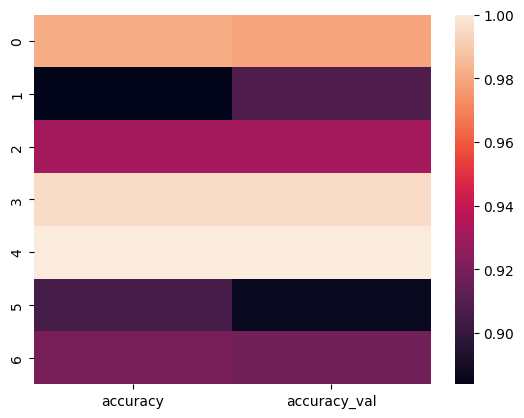

In [61]:
svm_model_accuracy = {'Obesity_Type': name,'accuracy': arr,'validation_accuracy':arr_val}
df_heatmap = pd.DataFrame(svm_model_accuracy, columns = ['Obesity_Type', 'accuracy','validation_accuracy'])
df2 = pd.DataFrame({"accuracy":df_heatmap['accuracy'],"accuracy_val":df_heatmap['validation_accuracy']})
sns.heatmap(df2)
plt.show()

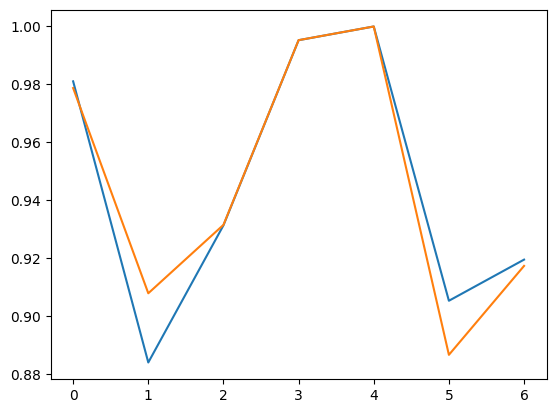

In [62]:
plt.plot(df2, linestyle = 'solid')
plt.show()

## Classification of People based on Transportation Mode 

In [63]:
def transportation_classification(X,y,z):
    train_size=0.6
    Xtrain, Xremaining, ytrain, yremaining = train_test_split(X,y, train_size=0.6, shuffle= True)
    test_size = 0.5
    Xtest, Xvalidation, ytest, yvalidation = train_test_split(Xremaining,yremaining, test_size=0.5, shuffle= True)
    #Split into training and test data (60/40)
    #Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.4, random_state = 42)
    model = RandomForestClassifier(n_estimators=1000)
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    ypredvalidation = model.predict(Xvalidation)
    
    accuracy = accuracy_score(ytest,y_pred)
    accuracy_valid = accuracy_score(yvalidation,ypredvalidation)
    return accuracy,accuracy_valid,z

In [64]:
X = obesity[['Age', 'Weight', 'FCVC', 'NCP','CH2O','FAF','Gender','family_history_with_overweight','FAVC','CAEC_Always','CAEC_Frequently','CAEC_Sometimes','CAEC_no','SMOKE','SCC',
        'CALC_Always','CALC_Frequently','CALC_Sometimes','CAEC_no','NObeyesdad_Insufficient_Weight','NObeyesdad_Normal_Weight','NObeyesdad_Obesity_Type_I','NObeyesdad_Obesity_Type_II','NObeyesdad_Obesity_Type_III','NObeyesdad_Overweight_Level_I','NObeyesdad_Overweight_Level_II']]

In [65]:
def append_accuracy_name(X,Y,Z,arr,arr_validate,name):
    accuracy ,accuracy_validation, transportation_type = transportation_classification(X,Y,Z)
    arr.append(accuracy)
    arr_validate.append(accuracy_validation)
    name.append(transportation_type)
    return arr,name,arr_validate

In [66]:
arr = []
arr_validate = []
name = []
arr, name, arr_validate = append_accuracy_name(X,obesity['MTRANS_Automobile'],'Automobile',arr,arr_validate,name)
arr, name, arr_validate = append_accuracy_name(X,obesity['MTRANS_Bike'],'Bike',arr,arr_validate,name)
arr, name, arr_validate = append_accuracy_name(X,obesity['MTRANS_Motorbike'],'Motorbike',arr,arr_validate,name)
arr, name, arr_validate = append_accuracy_name(X,obesity['MTRANS_Public_Transportation'],'Public_Transportation',arr,arr_validate,name)
arr, name, arr_validate = append_accuracy_name(X,obesity['MTRANS_Walking'],'Walking',arr,arr_validate,name)

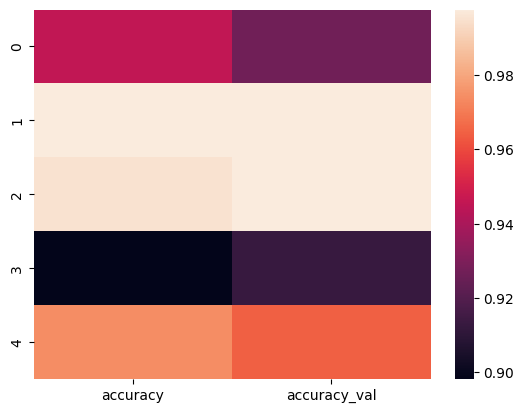

In [67]:
randomforest_model_accuracy = {'transportation_type': name,'accuracy': arr, 'validation_accuracy':arr_validate}
df = pd.DataFrame(randomforest_model_accuracy, columns = ['transportation_type', 'accuracy','validation_accuracy'])
df2 = pd.DataFrame({"accuracy":df['accuracy'],"accuracy_val":df['validation_accuracy']})
sns.heatmap(df2)
plt.show()

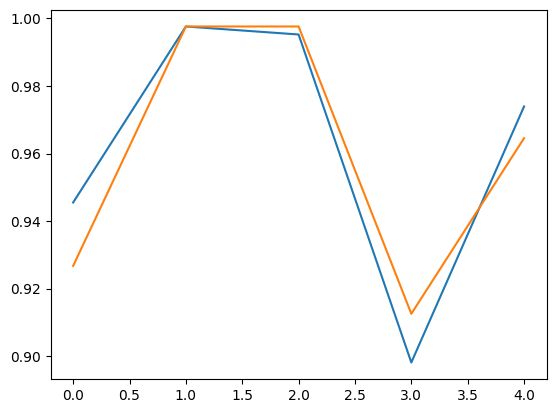

In [68]:
plt.plot(df2, linestyle = 'solid')
plt.show()